# Mathematical image processing 
1. subdivision-interpolation
* 4 point interpolation 1 dimension
* 4 point interpolation 2 dimension
2. Least Square 
3. Fourier Series
4. Non Local Means

## 4 point interpolation 1D

In [9]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
import matplotlib as mat
print(mat.matplotlib_fname())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


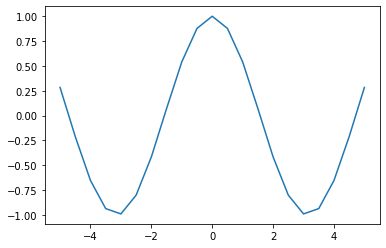

In [10]:
x=np.arange(-5,5.5,0.5)
y=np.cos(x)
plt.plot(x,y)

In [11]:
num=0.5
cf=np.array([[-1/16, 9/16, 9/16, -1/16]])
k=1
for j in range(1,k+1):
    intv=(num)**k
    x=np.arange(-5,5+intv,intv)
    y=np.cos(x)
    n=len(x)

    bdX=np.concatenate(([x[0]-intv],x,[x[-1]+intv]))
    bdY=np.cos(bdX)

    newX=np.arange(-5,5+intv/2,(intv)/2)
    newY=np.zeros((2*n-1))

    # new pt interp 점 대입
    for i in range(n-1):
        temp=bdY[i:i+4]@cf.T
        newY[2*i+1]=temp
        #newY[2*i+1]=bdY[i:i+4]@cf.T

    # old pt 대입
    for i in range(n):
        newY[2*i]=y[i]

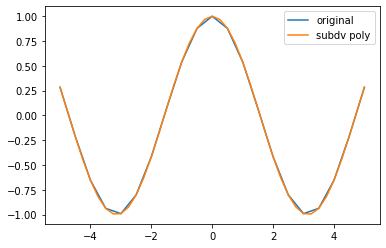

In [17]:
plt.plot(x,y,label='original')
plt.plot(newX,newY,label='subdv poly')
plt.legend(loc='upper right')
plt.show()

## 4 point interpolation 2D

In [14]:
def word_interp(x,y,k):
    cf=np.array([-1/16,9/16,9/16,-1/16])
    plt.plot(x,y)
    for j in range(k):
        n=len(x)
        bdX=np.concatenate(([x[-2]],x,[x[0]]))
        bdY=np.concatenate(([y[-2]],y,[y[0]]))

        newx=np.zeros(2*n-1)
        newy=np.zeros(2*n-1)
        
        #new point(subdivision)
        for i in range(n-1):
            newx[2*i+1]=bdX[i:i+4]@cf.T
            newy[2*i+1]=bdY[i:i+4]@cf.T
        #old point
        for i in range(n):
            newx[2*i]=x[i]
            newy[2*i]=y[i]

        x=newx
        y=newy
    plt.plot(newx,newy)

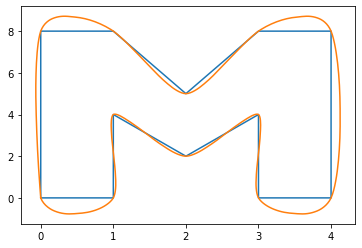

In [15]:
# Drawing M
x=np.array([0,1,1,2,3,3,4,4,3,2,1,0,0])
y=np.array([0,0,4,2,4,0,0,8,8,5,8,8,0])
word_interp(x,y,5)

## Least Square 1D

In [16]:
x=np.arange(-5,5.1,0.1)
N=len(x)
E=np.ones((N))
deg=3

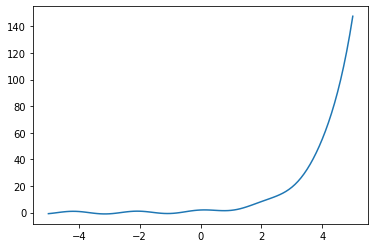

In [17]:
f=np.cos(3*x)+np.exp(x)
plt.plot(x,f)

In [18]:
deg=4
for i in range(1,deg+1):
    E = np.vstack((E,x**i))

In [19]:
E=np.asmatrix(E)
coeff=(E@E.T).I@E@f.T

pf=coeff@ E
pf=pf.reshape(-1,1)
f=f.reshape(-1,1)

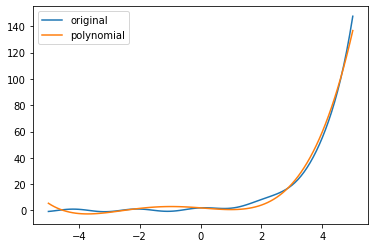

In [22]:
plt.plot(x,f,label='original')
plt.plot(x,pf,label='polynomial')
plt.legend(loc='upper left')
plt.show()

In [16]:
def least_sq(x,f,deg):
    N=len(x)
    E=np.ones((N))
    for i in range(1, deg+1):
        E=np.vstack((E,x**i))
    Ea=np.asmatrix(E)
    coeff=(Ea@Ea.T).I@Ea@f.T
    pol=coeff@E
    pf=pol.reshape(-1,1)
    
    plt.plot(x,f,label='original')
    plt.plot(x,pf,label='polynomial')
    plt.legend(loc='upper right')
    plt.show()

In [8]:
a=np.array([1,2,3,4])

In [9]:
np.shape(a)

(4,)

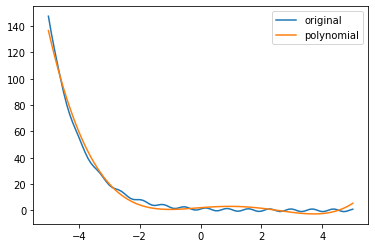

In [17]:
x=np.arange(-5,5.1,0.1)
f=f=np.sin(9*x)+np.exp(-x)
deg=4
least_sq(x,f,deg)

## Fourier Series

### discontinuous function with jump discontinuities

In [2]:
n=100
pi=math.pi
L=2*pi
x_temp=np.linspace(-L/2,L/2+1,n)
y_temp=x_temp

y=np.concatenate((y_temp, y_temp, y_temp))
x=np.linspace(-3*pi,3*pi+1,len(y))

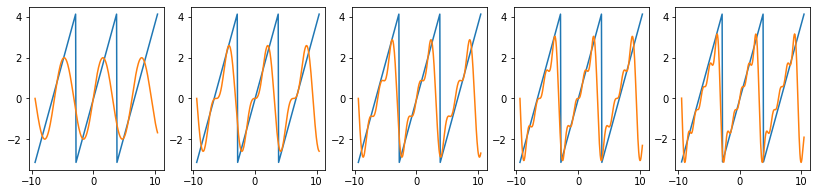

In [5]:
k=5
fig, axis=plt.subplots(1,k,figsize=(14,3))
for i in range(k):
    axis[i].plot(x,y)
    U=0
    for m in range(1,i+2):
        U=U+(2/m)*((-1)**(m+1))*np.sin(m*x)
    axis[i].plot(x,U)

## Image Zooming 
이미지를 흑백으로 변환 후 interpolation function을 이용해 2배로 확대

In [14]:
import matplotlib.image as mpimg

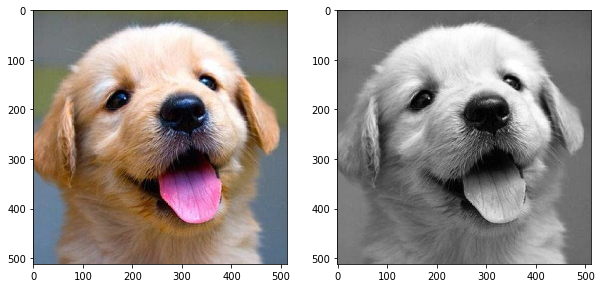

In [15]:
# RGB greyscale로 변환
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.144])

# subplot 공간 만들기
fig,axis= plt.subplots(1,2,figsize=(10,5))

puppy=mpimg.imread('puppy.jpg')
axis[0].imshow(puppy)

gray=rgb2gray(puppy)
axis[1].imshow(gray, cmap='gray')

plt.show()

In [16]:
#interpolation function 1D
def fpts_1D(x):
    c=np.array([-1/16, 9/16, 9/16, -1/16])
    n=len(x)
    x_m=np.concatenate(([x[1]],x, [x[n-2]]))
    new_x=np.zeros(2*n-1)
    for i in range(n-1):
        new_x[2*i]=x[i]
        new_x[2*i+1]=x_m[i:i+4]@c
    return new_x

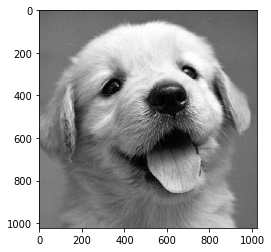

In [18]:
# Image Zooming Twice
I0=gray
m,n=np.shape(I0)
I_temp=np.zeros((m,2*n-1))
I_zoom=np.zeros((2*m-1,2*n-1))
for i in range(m):
    I_temp[i,:]=fpts_1D(I0[i,:])
for j in range(2*n-1):
    I_zoom[:,j]=fpts_1D(I_temp[:,j])
plt.imshow(I_zoom, cmap='gray')

## Non Local Means
#### 코드 미완성

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

### Gaussian Kernel

In [2]:
pi=math.pi
# Gaussian Kernel
def gauss(a,lamda):
    x=0
    GK=np.zeros((2*a+1,2*a+1))
    for i in range(-a,a+1):
        for j in range(-a,a+1):
            temp=np.exp(-(i**2+j**2)/2*(lamda**2))/(((2*pi)**0.5)*lamda)
            GK[a-i,a-j]=temp
            x+=temp
    GK=GK/x
    return GK

### Non local means function

In [10]:
def NLM(X,sr,wr,lamda):
    row,col=size(X)
    
    # denoising matrix space
    GX=np.zeros((row,col))
    
    #extension
    EX=np.pad(X,(wr,wr),'symmetric')
    
    #Gaussian Kernel
    GK=gauss(wr,lamda)
    
    #denoising
    for i in range(m):
        for j in range(n):
            i1=i+wr
            j1=j+wr
            W1=EX[i1-wr:i1+wr,j1-wr:j1+wr]
            p=0
            temp=0
            rmin=max(i1-sr,wr+1)
            rmax=min(i1+sr,row+wr)
            smin=max(j1-sr,wr+1)
            smax=min(j1+sr,col+wr)
            
            for r in range(rmin,rmax+1,1): 
            for s in range(smin,smin+1,1):
                p +=1
                if r==i1 and s==j1: continue
                W2=EX[r-wr:r+wr,s-wr:s+wr]
                diff=sum(np.reshape(Gk*(W1-W2)*(W1-W2),(-1,1)))
                w= np.exp(-diff/h**2)
                NF(p) = w
                temp+= w*EX[r,s]
            
            GX[i,j]=temp/sum(NF)
            
    return GX

IndentationError: expected an indented block (<ipython-input-10-68a8fda646a7>, line 25)